In [ ]:
# Load Data & Preprocess
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Load CSV
df = pd.read_csv('customer_segmentation_data.csv')

In [4]:
# Select numerical features for K-Means
num_features = ['age','spending_score','membership_years','purchase_frequency','last_purchase_amount']

In [5]:
# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_features])

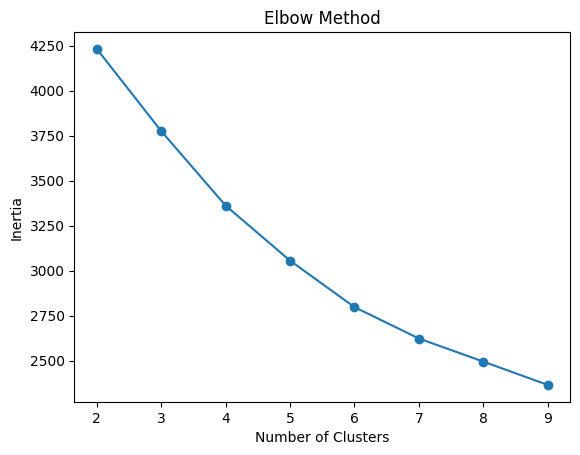

In [7]:
# Determine Optimal Number of Clusters (Elbow Method)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [8]:
# Apply K-Means Clustering

k = 4  # example, choose based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

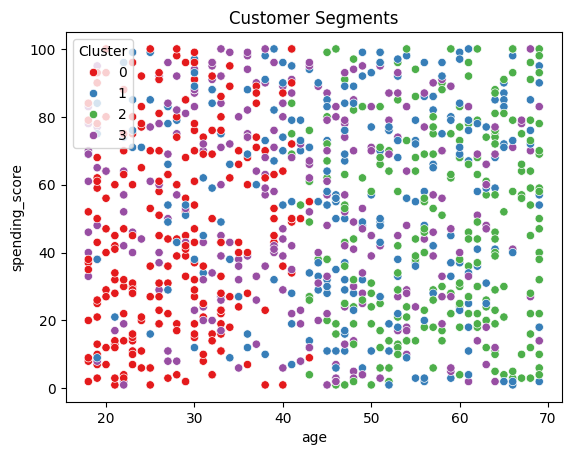

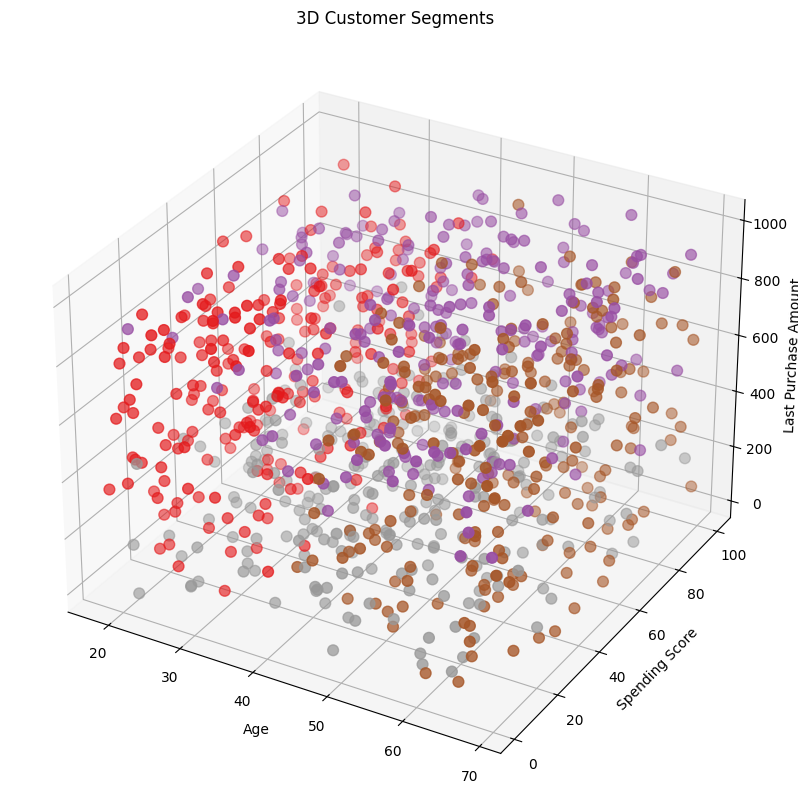

In [30]:
# Visualize Clusters

# 2D Scatter (Age vs Spending Score):

import seaborn as sns

sns.scatterplot(x='age', y='spending_score', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()

# 3D Scatter (Age, Spending Score, Last Purchase Amount):

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['spending_score'], df['last_purchase_amount'], 
           c=df['Cluster'], cmap='Set1', s=60)

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Last Purchase Amount')

plt.title('3D Customer Segments')
plt.show()

In [14]:
# Analyze Cluster Characteristics

cluster_summary = df.groupby('Cluster')[['age','spending_score','membership_years','purchase_frequency','last_purchase_amount']].mean()
print(cluster_summary)

               age  spending_score  membership_years  purchase_frequency  \
Cluster                                                                    
0        27.639831       45.266949          3.550847           24.919492   
1        47.666667       55.658537          8.081301           31.235772   
2        57.483740       48.060976          2.817073           25.601626   
3        41.886029       53.261029          7.169118           24.753676   

         last_purchase_amount  
Cluster                        
0                  553.725636  
1                  743.672073  
2                  511.714837  
3                  194.280294  
